# Анализ рынка недвижимости в Санкт-Петербурге и Ленинградской области

Требуется провести исследовательский анализ данных, используя архив объявлений о продаже
квартир 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Напишем функцию для пути файла, чтобы файл открывался и на локальном компьютере, и в практикуме

In [4]:
import os
def try_path(path):
    if os.path.exists(path):
        return path
    else:
        return "." + path

Посмотрим первые 5 строк файла

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(try_path('/datasets/real_estate_data.csv'))
df.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Видно, что данные записаны через разделитель знак табуляции, а не запятую. Учтем это при чтении файла

In [6]:
df = pd.read_csv(try_path('/datasets/real_estate_data.csv'), sep = '\\t', engine = 'python', encoding = 'utf-8')
df.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Переименуем столбец cityCenters_nearest  в соответствии с именами остальных столбцов

In [7]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True)

Выведем информацию о таблице

In [1675]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем описательные статистики по количественным данным, чтобы посмотреть насколько они реалистичны

In [1676]:
print(df.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

Посмотрим уникальные значения категориального столбца с названием населенного пункта

In [1677]:
unique_locality_names = df.query('locality_name.notnull()')['locality_name'].sort_values().unique()
print(unique_locality_names)

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

Посмотрим уникальные значения и их количество у булевых значений

In [1678]:
bool_cols = ['studio','open_plan','is_apartment']
for bool_col in bool_cols:
    print(df[bool_col].value_counts())
    print()

False    23550
True       149
Name: studio, dtype: int64

False    23632
True        67
Name: open_plan, dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64



- Проверим, что данные в столбцах parks_around3000 и parks_nearest согласованы: то что нет квартир, где нет ни одного парка в радиусе 3 км, но указано расстояние до ближайшего парка меньше 3 км.
- Проверим, что данные в столбцах ponds_around3000 и ponds_nearest согласованы: то что нет квартир, где нет ни одного пруда в радиусе 3 км, но указано расстояние до ближайшего парка меньше 3 км.

In [1679]:
print('Квартир, где неверные данные в информации о парках рядом:',df.query('parks_around3000 == 0 and  parks_nearest.notnull() and parks_nearest < 3000')['parks_nearest'].count())
print('Квартир, где неверные данные в информации о прудах рядом:',df.query('ponds_around3000 == 0 and  ponds_nearest.notnull() and ponds_nearest < 3000')['ponds_nearest'].count())

Квартир, где неверные данные в информации о парках рядом: 0
Квартир, где неверные данные в информации о прудах рядом: 0


- Проверим, что нет квартир, где указанный этаж квартиры больше чем количество этажей а доме  
- Проверим, что нет квартир, гже жилая площадь меньше общей площади

In [1680]:
print('Квартир, где этаж квартиры больше чем количество этажей в доме:',df.query('floor > floors_total')['floor'].count())
print('Квартир, где жилая площадь меньше общей:',df.query('living_area > total_area')['living_area'].count())

Квартир, где этаж квартиры больше чем количество этажей в доме: 0
Квартир, где жилая площадь меньше общей: 0


### Вывод

Посмотрели общую информацию о таблице (таблица состоит из 22 колонок и 23698 строк), описательные статистики по количественным данным, уникальные значения по категориальным. Проверили зависящие друг от друга данные на согласованность. 

Выявили следующие проблемы  в данных:  
1. Есть столбцы, где хранятся не те типы данных:
    - Есть ряд столбцов, где хранится float значения, а должны быть целые числа:
        - floors_total. Не может быть дробное число этажей
        - balcony. Не может быть дробное число балконов
        - airports_nearest. Нас интересует расстояние до метра
        - city_centers_nearest. Нас интересует расстояние до метра 
        - parks_around3000. Количество парков не может быть дробным       
        - parks_nearest. Нас интересует расстояние до метра       
        - ponds_around3000. Количество прудов не может быть дробным      
        - ponds_nearest. Нас интересует расстояние до метра    
        - days_exposition. Нас интересует количество дней без количества часов  
        - last_price. Нас интересует цена до рубля
    
    - Есть столбец first_day_exposition, где хранится строка, а должна быть дата  
    - Есть столбец is_apartment, где хранится строка, а должен быть bool  

2. Есть квартиры, выглядящие не очень реалистичными:
    - с ценой в 763 миллиона
    - с ценой в 12190
    - с площадью в 900м
    - с высотой потолка в 100м
    - с жилой площадью в 2м       

3. Есть пропуски в данных в виде null в большом количестве столбцов 

### Шаг 2. Предобработка данных

### Обработка пропусков

Выведем количество пропущенных значений

In [1681]:
print(df.isnull().sum().sort_values(ascending = False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64


- <i>is_apartment</i>

Посмотрим 10 строк, где пропущены значения is_apartment

In [1682]:
df.query('is_apartment.isnull()').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6424,1,4200000.0,33.35,2018-01-19T00:00:00,1,NaN,19.0,16.4,6,NaN,...,8.9,NaN,Санкт-Петербург,39141.0,15985.0,0.0,NaN,0.0,NaN,29.0
12913,9,5580000.0,53.20,2019-03-15T00:00:00,2,NaN,9.0,28.5,5,NaN,...,8.2,NaN,Пушкин,13015.0,25168.0,0.0,NaN,0.0,NaN,NaN
6937,11,5100000.0,74.70,2017-04-11T00:00:00,4,NaN,9.0,52.5,9,NaN,...,6.2,NaN,Санкт-Петербург,25192.0,10996.0,1.0,344.0,0.0,NaN,239.0
19832,4,1770000.0,46.00,2017-04-20T00:00:00,3,2.5,5.0,33.0,5,NaN,...,6.0,1.0,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,278.0
3346,12,3650000.0,46.50,2017-08-04T00:00:00,2,2.6,5.0,28.0,1,NaN,...,7.6,NaN,Санкт-Петербург,18522.0,15612.0,1.0,551.0,1.0,716.0,276.0
7681,5,4950000.0,73.90,2017-04-22T00:00:00,3,NaN,9.0,44.7,1,NaN,...,9.4,0.0,посёлок Шушары,23581.0,29367.0,0.0,NaN,0.0,NaN,28.0
21169,8,4900000.0,45.98,2017-09-27T00:00:00,2,NaN,20.0,14.0,13,NaN,...,19.0,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,132.0
4223,7,5370000.0,87.70,2019-04-04T00:00:00,4,2.6,10.0,55.1,2,NaN,...,11.3,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13531,14,2150000.0,54.00,2018-11-13T00:00:00,3,2.5,2.0,40.0,1,NaN,...,9.0,NaN,посёлок Кобралово,NaN,NaN,NaN,NaN,NaN,NaN,166.0
5965,18,7000000.0,65.00,2018-08-08T00:00:00,2,2.6,5.0,30.0,4,NaN,...,8.0,1.0,Санкт-Петербург,7893.0,18069.0,1.0,515.0,0.0,NaN,NaN


Пропущенных данных очень много и явных зависимостей от значений других столбцов не видно. Оставим пропущенные значения как есть, т.к. достоверно восстановить их мы не сможем

- <i>parks_nearest / ponds_nearest, ponds_around3000/parks_around3000</i>

В дальнейшем анализе мы не будем использовать информацию о расстоянии до парков/прудов и их наличии и пропусков очень много, поэтому можем оставить значения как есть. Если нам была бы нужна эта информация, то для небольших городов скорее всего ее можно было бы восстановить как медиану по городу. Для больших городов скорее всего был бы большой разброс значений и мы не смогли бы достоверно восстановить эту информацию 

- <i>ceiling_height</i>

Посмотрим описательные статистики и медиану по столбцу высота потолка

In [1683]:
print(df['ceiling_height'].describe())
print(df['ceiling_height'].median())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
2.65


Так как стандартное отклонение небольшое, то можем заменить пропущенные значения в высоте потолка на медиану

In [1684]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
print(df['ceiling_height'].isnull().sum())

0


- <i>balcony</i>

Можем предположить, что информацию о количестве балконов пользователь не ввел специально, чтобы не обращать на это внимание. Наличие балконов увеличивает стоимость квартиры и небольшая вероятноcть, что пользователь об этом забыл. Поэтому скорее всего в этих квартирах нет балконов. Заменим пропуски на 0

In [1685]:
df['balcony'] = df['balcony'].fillna(0)
print(df['balcony'].isnull().sum())

0


- <i>locality_name</i>

Посмотрим на записи, где пропущен населенный пункт. Нам нужно понять хранятся ли в них уникальные данные, которые мы не можем отбросить, или все как в среднем и тогда мы можем их отбросить

In [1686]:
df.query('locality_name.isnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,49.000000,4.900000e+01,49.000000,49.000000,49.000000,48.000000,44.000000,49.000000,40.000000,49.000000,41.000000,41.000000,41.000000,15.000000,41.000000,25.000000,48.000000
mean,8.000000,6.745167e+06,69.799796,2.326531,2.747347,9.666667,39.152727,5.448980,12.389500,0.285714,24572.341463,11278.902439,0.536585,476.733333,1.024390,489.280000,238.645833
std,5.552777,4.496722e+06,30.575956,0.944011,0.254401,7.677913,17.694664,5.784538,7.497993,0.707107,8461.691597,8910.058254,0.839570,179.158137,1.083693,232.420151,190.620542
min,0.000000,1.750000e+06,29.400000,1.000000,2.600000,2.000000,13.000000,1.000000,5.000000,0.000000,10556.000000,1322.000000,0.000000,67.000000,0.000000,142.000000,4.000000
25%,3.000000,3.950000e+06,46.500000,2.000000,2.650000,5.000000,27.550000,2.000000,8.200000,0.000000,21654.000000,4383.000000,0.000000,374.500000,0.000000,374.000000,83.250000
50%,7.000000,5.130593e+06,63.000000,2.000000,2.650000,6.000000,35.900000,3.000000,10.200000,0.000000,22041.000000,8943.000000,0.000000,472.000000,1.000000,374.000000,211.000000
75%,10.000000,8.000000e+06,83.000000,3.000000,2.700000,11.250000,51.100000,6.000000,12.250000,0.000000,25771.000000,17369.000000,1.000000,591.500000,1.000000,603.000000,331.250000
max,20.000000,2.400000e+07,178.300000,4.000000,4.000000,24.000000,94.000000,23.000000,41.600000,4.000000,60195.000000,41294.000000,3.000000,740.000000,3.000000,953.000000,869.000000


In [1687]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В данных с пропущенным именем населенного пункта не видно уникальных значений, удалим эти строки

In [1688]:
df.dropna(subset = ['locality_name'], inplace = True) 

- <i>city_centers_nearest</i>

Расстояние до центра города зависит от местоположения. Сгруппируем данные по городам и посмотрим на стандартное отклонение, медиану и среднее

In [1689]:
df.query('city_centers_nearest.notnull()').groupby('locality_name')['city_centers_nearest'].agg(['mean', 'std','median'])



,mean,std,median
locality_name,,,
Зеленогорск,54617.583333,3189.936893,53381.0
Колпино,32113.771513,1505.624864,32018.0
Красное Село,30020.284091,2761.588818,29140.5
Кронштадт,49195.726316,1647.487232,49575.0
Ломоносов,50739.969697,4003.546382,51677.0
Павловск,33206.921053,1298.380996,32683.0
Петергоф,35468.925373,5687.914990,33771.0
Пушкин,28745.375000,2752.362190,27930.5
Санкт-Петербург,11601.291571,4842.035279,12244.5


Так как стандарное отклонение небольшое для всех городов кроме Санкт-Петербурга, то заменим пропущенные значения в расстоянии до центра города медианным значением по населенному пункту

In [1690]:
print('До замены пропущенных значений',df['city_centers_nearest'].isnull().sum())

def median_city_center(data):
    if(data.isnull().sum() != len(data)):
        df.loc[data.index,'city_centers_nearest'] = data.median()

df.loc[df['locality_name'] != 'Санкт-Петербург'].groupby('locality_name')['city_centers_nearest'].apply(median_city_center)

print('После замены пропущенных значений',df['city_centers_nearest'].isnull().sum())

До замены пропущенных значений 5511
После замены пропущенных значений 5447


У нас осталось много null, потому что у нас нет информации по части городов и восстановить мы ее не можем. Оставим как есть null

- <i>airports_nearest</i>

In [1691]:
df.query('airports_nearest.notnull()').groupby('locality_name')['airports_nearest'].agg(['mean', 'std','median'])

,mean,std,median
locality_name,,,
Зеленогорск,73300.250000,3049.461011,72282.0
Колпино,26375.863501,1578.628611,26232.0
Красное Село,26595.579545,2761.538822,25715.5
Кронштадт,67469.263158,1648.522480,67850.0
Ломоносов,48308.280303,1213.279691,48415.5
Павловск,21053.342105,1298.399998,20529.5
Петергоф,40184.676617,4077.653990,39231.0
Пушкин,16447.869919,2493.217619,15766.0
Санкт-Петербург,28046.186237,11557.063820,26757.5


Стандартное отклонение небольше для всех городов кроме Санкт-Петербурга. Заменим пропущенные значения на медиану во всех городах кроме Санкт-Петербурга

In [1692]:
print('До замены пропущенных значений',df['airports_nearest'].isnull().sum())

def median_airports_nearest(data):
    if(data.isnull().sum() != len(data)):
        df.loc[data.index,'airports_nearest'] = data.median()

df.loc[df['locality_name'] != 'Санкт-Петербург'].groupby('locality_name')['airports_nearest'].apply(median_city_center)

print('После замены пропущенных значений',df['airports_nearest'].isnull().sum())

До замены пропущенных значений 5534
После замены пропущенных значений 5534


Мы не знаем информацию о расстояние до аэропорта в части городов, поэтому оставим null

- <i>floors_total</i>

Посмотрим есть ли какие-то выбивающиеся значения для записей, где общее количество этажей пропущено, относительно всего датасета

In [1693]:
df.query('floors_total.isnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,85.00000,8.500000e+01,85.000000,85.000000,85.000000,0.0,52.000000,85.000000,38.000000,85.000000,75.000000,76.000000,75.000000,34.000000,75.000000,49.000000,76.000000
mean,5.40000,6.837391e+06,62.060471,1.917647,2.663529,NaN,31.750000,10.094118,13.604211,0.047059,30280.946667,16607.973684,0.613333,549.941176,0.813333,475.714286,183.921053
std,4.00357,5.579873e+06,37.133018,1.082455,0.051402,NaN,18.531614,6.211785,5.824369,0.304954,13758.488951,10069.722677,0.786599,529.757975,0.747850,243.730811,233.087667
min,0.00000,1.640000e+06,23.170000,0.000000,2.650000,NaN,10.000000,1.000000,3.500000,0.000000,7050.000000,3148.000000,0.000000,24.000000,0.000000,130.000000,3.000000
25%,3.00000,3.440000e+06,35.790000,1.000000,2.650000,NaN,17.375000,5.000000,10.647500,0.000000,22041.000000,11303.750000,0.000000,251.000000,0.000000,350.000000,50.500000
50%,5.00000,5.235000e+06,55.200000,2.000000,2.650000,NaN,31.000000,8.000000,12.150000,0.000000,26402.000000,14637.000000,0.000000,400.000000,1.000000,374.000000,111.500000
75%,8.00000,7.650000e+06,76.500000,3.000000,2.650000,NaN,40.902500,14.000000,14.942500,0.000000,41472.000000,17369.000000,1.000000,655.250000,1.000000,652.000000,195.000000
max,19.00000,4.034825e+07,284.000000,6.000000,3.000000,NaN,104.760000,24.000000,40.000000,2.000000,61908.000000,61908.000000,3.000000,2276.000000,3.000000,1158.000000,1257.000000


In [1694]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18203.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14723.379141,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,10979.879029,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9267.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13135.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16039.500000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,84665.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Выбивающихся значений в записях, где пропущено количество этажей - нет. Можем удалить эти записи

In [1695]:
df.dropna(subset = ['floors_total'], inplace = True) 

- <i>kitchen_area и living_area</i>

Посмотрим матрицу корреляции для kitchen_area и living_area, чтобы узнать от чего они зависят

In [1696]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.105026,0.116969,0.099759,0.004470,0.009822,0.105551,0.032781,-0.028201,-0.024670,0.106896,0.046879,-0.002701,-0.053182,0.020955,-0.006017,-0.011352,-0.003995,-0.027340
last_price,0.105026,1.000000,0.653621,0.363191,0.064411,-0.006745,0.566380,0.026842,-0.025084,-0.008801,0.520362,0.008568,-0.026216,-0.174464,0.151492,-0.016529,0.160735,-0.085836,0.080858
total_area,0.116969,0.653621,1.000000,0.758735,0.080765,-0.075252,0.939771,-0.024368,-0.072000,-0.034942,0.609248,0.010243,-0.030466,-0.201045,0.165890,-0.021266,0.163757,-0.100140,0.149974
rooms,0.099759,0.363191,0.758735,1.000000,0.047958,-0.227913,0.846117,-0.151341,-0.146068,-0.087735,0.270342,-0.015542,-0.060975,-0.177456,0.137806,-0.053719,0.093600,-0.060119,0.126969
ceiling_height,0.004470,0.064411,0.080765,0.047958,1.000000,-0.026747,0.078636,-0.012604,0.000381,0.017674,0.071585,0.032777,-0.018764,-0.060907,0.056845,-0.019055,0.063707,-0.047483,0.018098
floors_total,0.009822,-0.006745,-0.075252,-0.227913,-0.026747,1.000000,-0.168940,0.678010,0.070224,0.050844,0.164803,0.173408,0.108547,0.124716,-0.252490,0.097608,-0.122799,0.040003,-0.052410
living_area,0.105551,0.566380,0.939771,0.846117,0.078636,-0.168940,1.000000,-0.096676,-0.056307,-0.033756,0.428909,-0.014786,-0.057428,-0.212514,0.184878,-0.050694,0.149785,-0.082830,0.142135
floor,0.032781,0.026842,-0.024368,-0.151341,-0.012604,0.678010,-0.096676,1.000000,0.035946,0.036184,0.136545,0.171507,0.073129,0.086546,-0.163601,0.072988,-0.076240,0.026467,-0.039042
studio,-0.028201,-0.025084,-0.072000,-0.146068,0.000381,0.070224,-0.056307,0.035946,1.000000,-0.004216,NaN,0.030019,-0.021707,-0.002705,-0.030857,0.006923,0.000813,0.001838,-0.021572
open_plan,-0.024670,-0.008801,-0.034942,-0.087735,0.017674,0.050844,-0.033756,0.036184,-0.004216,1.000000,NaN,0.032541,-0.013638,0.005317,-0.010118,0.010692,0.008516,-0.003395,-0.024146


По матрице видно, что площадь кухни зависит от общей площади  cо средним коэффициентом в 0.6  и жилая площадь от общей с высоким - 0.9. Это значит, что можем заменить площадь кухни и общую площадь на медиану по общей площади

In [1697]:
print('До замены пропущенных значений',df['kitchen_area'].isnull().sum())
print('До замены пропущенных значений',df['living_area'].isnull().sum())

def median_kitchen_area(data):
    if(data.isnull().sum() != len(data)):
        df.loc[data.index,'kitchen_area'] = data.median()

def median_living_area(data):
    if(data.isnull().sum() != len(data)):
        df.loc[data.index,'living_area'] = data.median()

df.groupby('total_area')['kitchen_area'].apply(median_kitchen_area)
df.groupby('total_area')['living_area'].apply(median_living_area)
    


print('После замены пропущенных значений',df['kitchen_area'].isnull().sum())
print('После замены пропущенных значений',df['living_area'].isnull().sum())

До замены пропущенных значений 2222
До замены пропущенных значений 1865
После замены пропущенных значений 185
После замены пропущенных значений 133


После замены осталось немного пропущенных значений в площади кухни и жилой площади, их мы заменять не будем

<i>- days_exposition </i>

Сколько дней было размещено объявление мы не можем восстановить по имеющейся информации, поэтому оставим null

Посмотрим сколько осталось пропущенных значений по всей таблице после их чистки

In [1698]:
print(df.isnull().sum().sort_values(ascending = False))

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
airports_nearest         5524
ponds_around3000         5500
parks_around3000         5500
city_centers_nearest     5438
days_exposition          3171
kitchen_area              185
living_area               133
ceiling_height              0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
studio                      0
floors_total                0
floor                       0
open_plan                   0
balcony                     0
locality_name               0
total_images                0
dtype: int64


### Вывод 

Обнаружили пропущенные значения в следующих колонках и оставили их как есть:
    - is_apartment. Пропущенных данных очень много и у нас нет данных, по которым мы могли бы восстановить эти значения. Вероятная причина появления пропусков - пользователь не заполнил это поле
    - parks_nearest/ponds_nearest и parks_around3000/ponds_around3000. Пропущенных данных много, в дальнейшем анализе не будем использовать эти данные. Предложили вариант замены, если бы эти данные нам потребовались. Вероятная причина пропусков - не подтянулись геоданные для этих квартир 
    - days_exposition. Нет данных, по которым мы могли бы восстановить данные в этом столбце. Вероятная причина пропусков - квартиры еще не проданы на момент выгрузки базы

Обнаружили следующие пропущенные значения и сделали замену значений на медиану в колонках:
    - ceiling_height. Стандарное отклонение небольшое и это значит, что разброс в высотах потолков не велик, поэтому сделали замену на медиану. Верояная причина пропусков - пользователь не заполнил эту информацию


Обнаружили следующие пропущенные значения и сделали замену значений на медиану по группам в колонках:
    - airports_nearest и city_centers_nearest. Обнаружили, что разброс значений небольшой для всех городов кроме Санкт-Петербурга. Сделали замену на медиану, сгруппировав данные по городу. В части данных остались пропуски, т.к. нет данных для этих городов или их город Санкт-Петербург. Вероятная причина пропусков - не подтянулись геоданные для этих квартир
    - kitchen_area и living_area. Обнаружили, что у этих значений достаточно высокий коэффициент корелляции с общей площадью. Сделали замену на медиану, сгруппировав данные по общей площади. В части данных остались пропуски, т.к. нет данных для этих городов или их город Санкт-Петербург. Вероятная причина пропусков - пользователь не заполнил эти данные
    

Обнаружили пропущенные значения и удалили их в колонках :
    - locality_name. Мало пропущенных значений и не можем их восстановить. Вероятная причина пропусков - пользователь не заполнил город
    - floors_total. Мало пропущенных значений и они не являются уникальными. Вероятная причина пропусков - не подгрузились данные об этажности дома в систему

Обнаружили пропущенные значения и заменили на 0 в колонке:
    - balcony. Можем предположить, что информацию о количестве балконов пользователь не ввел специально, чтобы не обращать на это внимание. Наличие балконов увеличивает стоимость квартиры и небольшая вероятноcть, что пользователь об этом забыл.

### Замена типов данных

1. Округлим float значения до целого и приведем их к int для следующих столбцов.
        - floors_total. Не может быть дробное число этажей
        - balcony. Не может быть дробное число балконов
        - airports_nearest. Нас интересует расстояние до метра
        - city_centers_nearest. Нас интересует расстояние до метра 
        - parks_around3000. Количество парков не может быть дробным       
        - parks_nearest. Нас интересует расстояние до метра       
        - ponds_around3000. Количество прудов не может быть дробным      
        - ponds_nearest. Нас интересует расстояние до метра    
        - days_exposition. Нас интересует количество дней без количества часов  
        - last_price. Нас интересует цена до рубля
    


In [1699]:
cols_float_to_int = (['floors_total','balcony','airports_nearest','city_centers_nearest','parks_around3000','parks_nearest',
'ponds_around3000','ponds_nearest','days_exposition','last_price'])

for col in cols_float_to_int:
    df.loc[df[col].isnull() != True,col] = round(df[df[col].isnull() != True][col],0).astype('int')


2.Поменяем тип данных first_day_exposition, где хранится строка, а должна быть дата  

In [1700]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Посмотрим информацию по типам данным в таблице после изменений`

In [1701]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23432 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23380 non-null  float64       
 13  balcony         

### Вывод

Округлили значения в следующих столбцах, привели их к int:
        - floors_total. Не может быть дробное число этажей
        - balcony. Не может быть дробное число балконов 
        - last_price. Нас интересует цена до рубля
        
Округлили значения в следующих столбцах, тип данных остался float, т.к. в столбце есть null значения:
        - airports_nearest. Нас интересует расстояние до метра
        - city_centers_nearest. Нас интересует расстояние до метра 
        - parks_around3000. Количество парков не может быть дробным       
        - parks_nearest. Нас интересует расстояние до метра       
        - ponds_around3000. Количество прудов не может быть дробным      
        - ponds_nearest. Нас интересует расстояние до метра    
        - days_exposition. Нас интересует количество дней без количества часов 
        
Поменяли тип данных first_day_exposition на дату    

### Обработка дубликатов

У нас есть столбец с именем населенного пункта. В связи с использованием разных регистров, использованием е и ё в одних и тех же словах, разным написанием одних и тех же населенных пунктов у нас могли возникнуть дубли в данных. Т.к. у нас нет уникальных id для квартир, то нам стоит это проверить

Приведем имя населенного пункта к нижнему регистру и заменем ё на е

In [1702]:

df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'].replace('ё','е',regex=True, inplace = True)


Дубли  в данных могли появится, если один и тот же населенный пункт назван по-разному в таблице. Например, "деревня А" и "А". Разобьем locality_name на слова и запишем их в новый dataframe. Удалим все дубли. Создадим словарь, в котором будут храниться слова из имен населенных пунктов и частота их встречаемости. Удалим все слова, которые встретились один раз, т.к. нас интересуют только повторы.

In [1703]:
locality_names_splitted = df['locality_name'].str.split(' ',expand=True)
locality_names_splitted = locality_names_splitted.drop_duplicates().reset_index(drop = True)
towns_dict = dict()

for index, row in locality_names_splitted.iterrows():
    for cell in row:
        if cell:
            if cell in towns_dict:
                towns_dict[cell] += 1
            else:
                towns_dict[cell] = 1


town_dict_keys_copy = list(towns_dict.keys())
for k in town_dict_keys_copy :
    if towns_dict[k] == 1:
        del towns_dict[k]

print(towns_dict)        

{'поселок': 167, 'городской': 13, 'мурино': 2, 'деревня': 106, 'кудрово': 2, 'городского': 30, 'типа': 30, 'бор': 6, 'федоровское': 2, 'садовое': 4, 'товарищество': 5, 'новая': 2, 'ропша': 2, 'село': 10, 'старая': 4, 'новый': 2, 'никольское': 2, 'романовка': 2, 'рощино': 2, 'павлово': 3, 'советский': 2, 'большая': 4, 'ижора': 2, 'лесогорский': 2, 'рахья': 2, 'колпаны': 2, 'ладога': 2, 'зимитицы': 2, 'имени': 2, 'рябово': 2, 'станции': 8, 'бегуницы': 2, 'мга': 2, 'малое': 2, 'вещево': 2, 'калитино': 2, 'приладожский': 2, 'щеглово': 2, 'рабитицы': 2, 'назия': 2, 'гарболово': 2, 'приветнинское': 2, 'любань': 2, 'красная': 2, 'горка': 2, 'при': 2, 'железнодорожной': 2, 'громово': 2, 'коттеджный': 3, 'лесное': 2}


Видно, что в словаре много слов, являющихся типом населенного пункта или частью названия новый/старый, предлоги. Удалим эти значения. Посмотрим какие полные названия городов у нас есть с оставшимися названиями

In [1704]:
keys_delete = ['поселок','городской','деревня','городского','типа','садовое','товарищество','новая','старая','село','новый','большая','имени','станции','при','железнодорожной','коттеджный']
for key in keys_delete:
    try:
        del towns_dict[key]
    except:
        print('перезапущен не весь notebook. Эти столбцы уже были удалены')
        break

for key, value in towns_dict.items():
    print(df.loc[df['locality_name'].str.contains(key) == True]['locality_name'].unique())
    print()

['поселок мурино' 'мурино']

['деревня кудрово' 'кудрово']

['поселок городского типа красный бор' 'выборг' 'сосновый бор'
 'деревня чудской бор' 'деревня бор' 'деревня трубников бор'
 'поселок пансионат зеленый бор' 'деревня борисова грива']

['деревня федоровское' 'городской поселок федоровское']

['садовое товарищество новая ропша' 'поселок ропша']

['никольское' 'село никольское']

['поселок романовка' 'деревня малая романовка']

['поселок городского типа рощино' 'городской поселок рощино']

['село павлово' 'городской поселок павлово'
 'поселок городского типа павлово']

['поселок городского типа советский' 'городской поселок советский']

['городской поселок большая ижора' 'поселок городского типа большая ижора'
 'поселок усть-ижора']

['городской поселок лесогорский' 'поселок городского типа лесогорский']

['поселок городского типа рахья' 'садовое товарищество рахья']

['деревня большие колпаны' 'деревня малые колпаны']

['новая ладога' 'село старая ладога']

['поселок зимитицы' '

Удалим из словаря названия населенных пунктов, которые на самом деле являются разными населенными пунктами (например, деревня рабитицы и поселок рабитицы)

In [1705]:
try:
    towns_dict['большая ижора'] = towns_dict['ижора']
    del towns_dict['ижора']
except:
    print('перезапущен не весь notebook. Эти столбцы уже были удалены')


keys_delete = ['бор','ропша','романовка','рахья','колпаны','зимитицы','бегуницы','малое','приладожский','калитино','щеглово','рабитицы','гарболово','красная','горка','лесное','ладога']
for key in keys_delete:
    try:
        del towns_dict[key]
    except:
        print('перезапущен не весь notebook. Эти столбцы уже были удалены')
        break
    

print(towns_dict)


{'мурино': 2, 'кудрово': 2, 'федоровское': 2, 'никольское': 2, 'рощино': 2, 'павлово': 3, 'советский': 2, 'лесогорский': 2, 'рябово': 2, 'мга': 2, 'вещево': 2, 'назия': 2, 'приветнинское': 2, 'любань': 2, 'громово': 2, 'большая ижора': 2}


Сформируем словарь, в котором будут хранится все возможные написания населенных пунктов для дублей

In [1706]:

for key, value in towns_dict.items():
    towns_dict[key] = df.loc[df['locality_name'].str.contains(key) == True]['locality_name'].unique()
print(towns_dict)



{'мурино': array(['поселок мурино', 'мурино'], dtype=object), 'кудрово': array(['деревня кудрово', 'кудрово'], dtype=object), 'федоровское': array(['деревня федоровское', 'городской поселок федоровское'],
      dtype=object), 'никольское': array(['никольское', 'село никольское'], dtype=object), 'рощино': array(['поселок городского типа рощино', 'городской поселок рощино'],
      dtype=object), 'павлово': array(['село павлово', 'городской поселок павлово',
       'поселок городского типа павлово'], dtype=object), 'советский': array(['поселок городского типа советский', 'городской поселок советский'],
      dtype=object), 'лесогорский': array(['городской поселок лесогорский',
       'поселок городского типа лесогорский'], dtype=object), 'рябово': array(['поселок рябово', 'поселок городского типа рябово'], dtype=object), 'мга': array(['городской поселок мга', 'поселок городского типа мга'],
      dtype=object), 'вещево': array(['поселок станции вещево',
       'поселок при железнодорожной

Приведем все задублированные из-за разного написания названия населенных пунктов к одному названию

In [1707]:
def set_unified_town_name(locality_name):
    for key, value in towns_dict.items():
        if key in locality_name:
            return value[0] 
        else:
            return locality_name
        
df['locality_name'] = df['locality_name'].apply(set_unified_town_name)

Проверим количество дублей после наших изменений

In [1708]:
print('Количество дублей:',df.duplicated().sum())

Количество дублей: 0


### Вывод

Предположили, что у нас могут быть дубликаты в данных, вызванные разным написанием населенных пунктов. Заменили ё на е, привели к нижнему регистру названия населенных пунктов. Повторяющиеся имена населенных пунктов с разным написанием(например "деревня А" и "А") привели к одному формату. Проверили количество дублей после наших изменений, дублей - нет. 


### Шаг 3. Посчитайте и добавьте в таблицу

- Добавим в нашу таблицу цену квадратного метра    

In [1709]:
df['price_per_meter'] =  round(df['last_price'] / df['total_area']).astype('int')

df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,61.2,8,NaN,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,2,поселок шушары,12817.0,17427.0,0.0,NaN,0.0,NaN,81.0,82921
2,10,5196000,56.0,2015-08-20,2,2.65,5,33.0,4,NaN,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786
3,0,64900000,159.0,2015-07-24,3,2.65,14,95.0,9,NaN,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,57.0,13,NaN,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000


- Добавим в таблицу столбцы: день недели, месяц и год публикации объявления;

In [1710]:
df['exposition_date_weekday'] = df['first_day_exposition'].dt.weekday+1
df['exposition_date_month'] = df['first_day_exposition'].dt.month
df['exposition_date_year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_date_weekday,exposition_date_month,exposition_date_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,61.2,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,4,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,17427.0,0.0,NaN,0.0,NaN,81.0,82921,2,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,33.0,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92786,4,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,95.0,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,5,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,57.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,2,6,2018


- Добавим в таблицу этаж, на котором расположена квартира; варианты — первый, последний, другой

In [1711]:

def set_floor_type(in_df):
    if(in_df['floor'] == 1):
        return 'первый'
    elif(in_df['floors_total'] == in_df['floor']):
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(set_floor_type, axis = 1)
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_date_weekday,exposition_date_month,exposition_date_year,floor_type
2580,6,30900000,338.6,2017-10-16,7,3.86,6,230.000,4,NaN,...,0.0,NaN,0.0,NaN,406.0,91258,1,10,2017,другой
14138,17,6575000,45.1,2017-10-12,2,2.80,5,27.050,2,NaN,...,0.0,NaN,0.0,NaN,138.0,145787,4,10,2017,другой
18698,12,3500000,47.0,2018-02-10,2,2.50,5,28.000,1,NaN,...,0.0,NaN,0.0,NaN,45.0,74468,6,2,2018,первый
1684,12,5400000,43.0,2017-11-27,1,2.65,18,23.000,12,NaN,...,1.0,401.0,0.0,NaN,57.0,125581,1,11,2017,другой
19849,8,3300000,46.0,2016-10-10,2,2.65,5,28.315,1,NaN,...,0.0,NaN,0.0,NaN,205.0,71739,1,10,2016,первый


- добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [1712]:
df['ratio_living_total_area'] = round(df['living_area'] / df['total_area'],2)
df['ratio_kitchen_total_area'] = round(df['kitchen_area'] / df['total_area'],2)
df.sample(5)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_date_weekday,exposition_date_month,exposition_date_year,floor_type,ratio_living_total_area,ratio_kitchen_total_area
20213,20,14000000,102.0,2019-03-26,3,3.80,5,58.3,4,False,...,1.0,727.0,NaN,137255,2,3,2019,другой,0.57,0.15
2185,6,5990000,87.7,2018-02-15,3,2.60,10,55.1,2,NaN,...,NaN,NaN,120.0,68301,4,2,2018,другой,0.63,0.16
9140,12,1800000,35.0,2017-12-11,1,2.65,5,17.0,3,NaN,...,NaN,NaN,43.0,51429,1,12,2017,другой,0.49,0.26
16599,9,2100000,35.0,2019-02-12,1,2.50,5,17.0,5,NaN,...,NaN,NaN,NaN,60000,2,2,2019,последний,0.49,0.26
19189,20,6800000,61.0,2017-08-25,2,2.65,16,38.8,13,NaN,...,0.0,NaN,76.0,111475,5,8,2017,другой,0.64,0.14


### Вывод

Добавили в таблицу следующие значения
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж, на котором расположена квартира; варианты — первый,последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

Выделим наиболее важные характеристики при продаже квартир: общая площадь, жилая площадь, площадь кухни, цена,количество комнат, наличие балкона, высота потолков. Построим гистограммы, чтобы посмотреть какие параметры наиболее характерны. Посмотрим гистограмму для количества дней, сколько объявление было на сайте до продажи, чтобы определить обычную длительность процесса продажи.

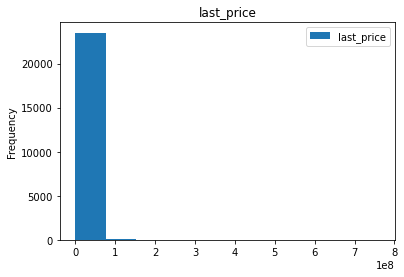

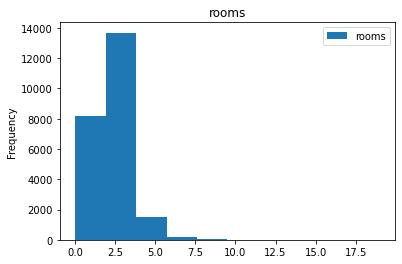

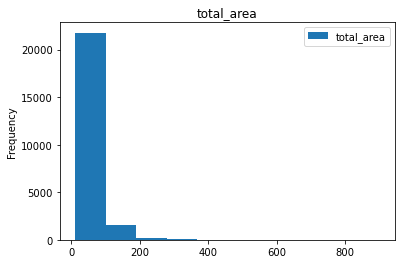

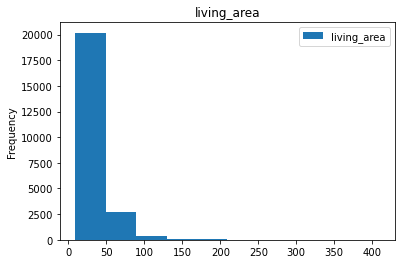

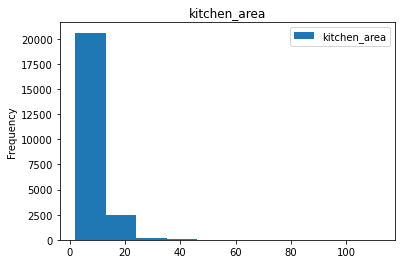

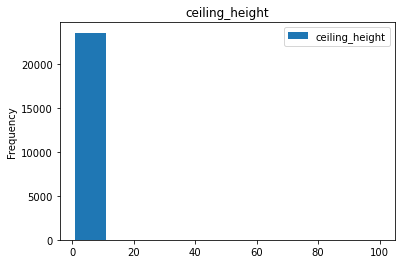

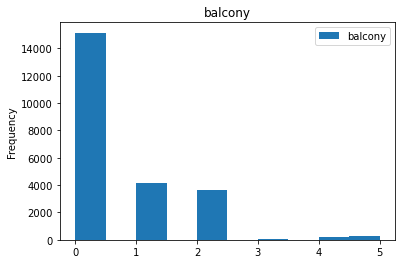

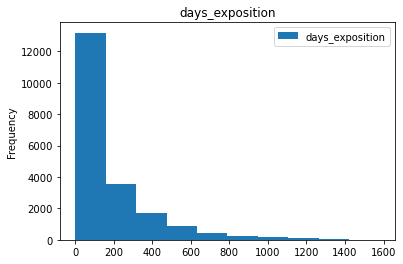

In [1713]:
cols = ['last_price','rooms','total_area','living_area','kitchen_area','ceiling_height','balcony','days_exposition']

for col in cols:
    df.plot(kind = 'hist', y = col, title = col, bins = 10)
    plt.show()

Посмотрим на некоторые из графиков более близко на места, где находятся самые большие значения

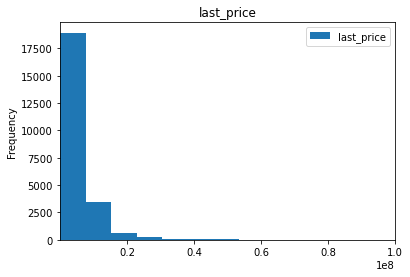

In [1714]:

df.plot(kind = 'hist', y = 'last_price', title = 'last_price', bins = 100,xlim = (10000,100000000));


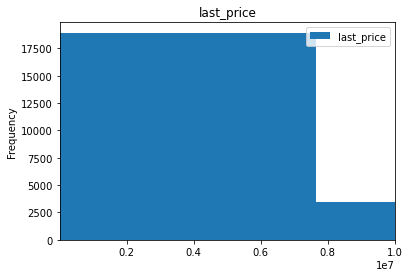

In [1715]:
df.plot(kind = 'hist', y = 'last_price', title = 'last_price', bins = 100,xlim = (10000,10000000));

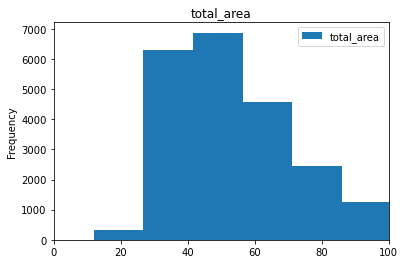

In [1716]:
df.plot(kind = 'hist', y = 'total_area', title = 'total_area', bins = 60,xlim = (0,100));

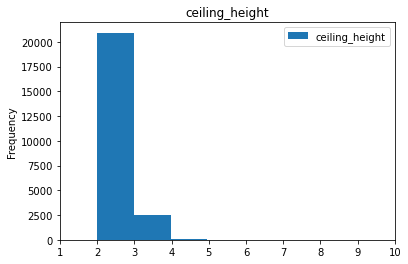

In [1717]:
df.plot(kind = 'hist', y = 'ceiling_height', title = 'ceiling_height', bins = 100,xlim = (1,10));

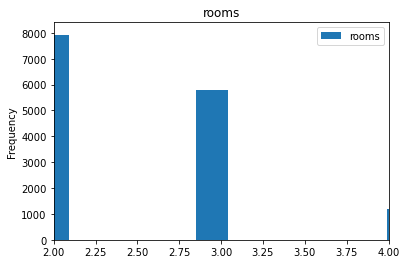

In [1718]:
df.plot(kind = 'hist', y = 'rooms', title = 'rooms', bins = 100,xlim = (2,4));

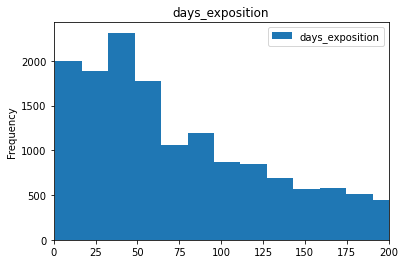

In [1719]:
df.plot(kind = 'hist', y = 'days_exposition', title = 'days_exposition', bins = 100,xlim = (0,200));

Посмотрим на медиану и среднее значение для количества дней, сколько висело объявление на сайте до продажи

In [1720]:
print('mean days exposition',df['days_exposition'].mean())
print('median days exposition',df['days_exposition'].median())

mean days exposition 180.7413945278023
median days exposition 95.0


Посмотрим на описательные статистики для столбца days exposition

In [1721]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод

Выявили наиболее типичные параметры продаваемых квартир:
    - количество комнат: 2
    - общая площадь: 50м
    - жилая площадь: до 50 метров
    - площадь кухни: до 10 метров
    - количество балконов: 0
    - высота потолков: от 2 до 3 метров
    - цена: до 8 000 000

Процесс продажи длится обычно до 60 дней. Медиана больше среднего для количества дней до продажи примерно в 2 раза, что значит, что данные очень сильно разбросаны по этому параметру. Можно считать, что продажа прошла очень быстро, если она заняла до 25 дней и очень медленно, если более 230 дней

#### - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили. 

Посмотрим на диаграмму размаха для основных параметров

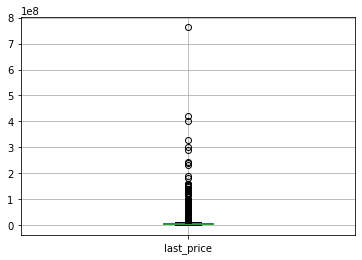

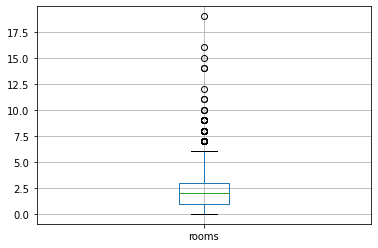

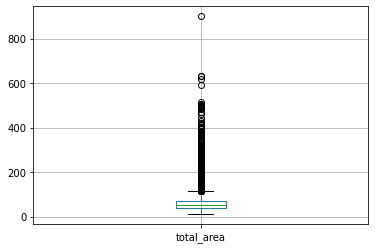

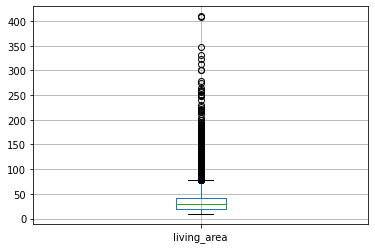

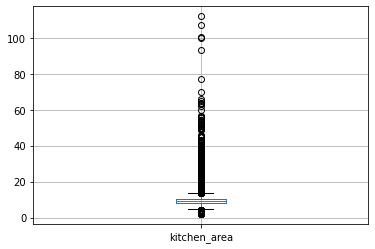

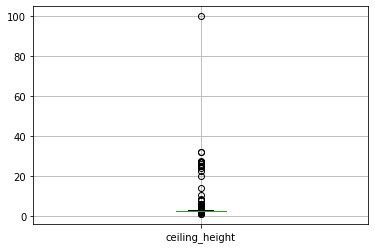

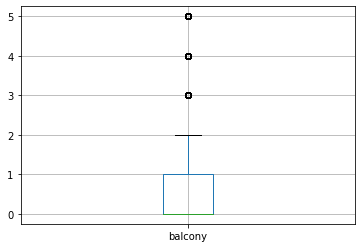

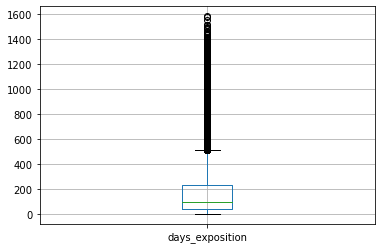

In [1722]:
cols = ['last_price','rooms','total_area','living_area','kitchen_area','ceiling_height','balcony','days_exposition']

for col in cols:
    df.boxplot(column = col)
    plt.show()

Посмотрим на некоторые из графиков на область выбросов поближе

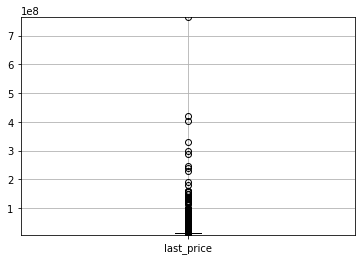

In [1723]:
def show_boxplot_75_max(in_df,col):
    col_75_perc = in_df[col].quantile(0.75)
    col_max =in_df[col].max()
    plt.ylim(col_75_perc, col_max)
    df.boxplot(column = col)

show_boxplot_75_max(df, 'last_price');

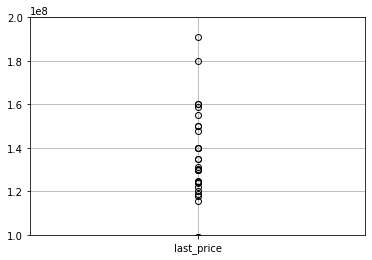

In [1724]:
plt.ylim(100000000, 200000000)
df.boxplot(column = 'last_price');

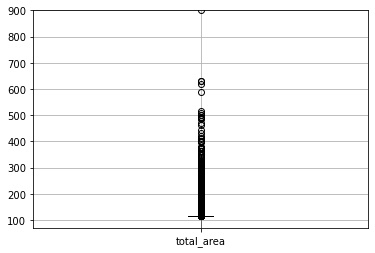

In [1725]:
show_boxplot_75_max(df, 'total_area');

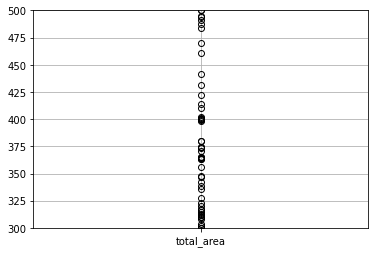

In [1726]:
plt.ylim(300, 500)
df.boxplot(column = 'total_area');

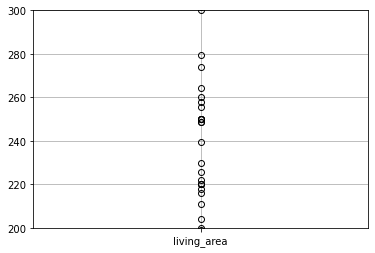

In [1727]:
plt.ylim(200, 300)
df.boxplot(column = 'living_area');

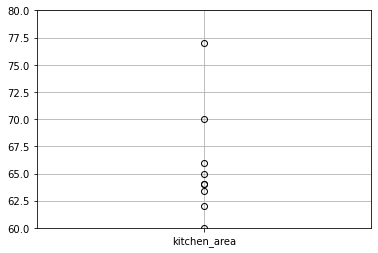

In [1728]:
plt.ylim(60, 80)
df.boxplot(column = 'kitchen_area');

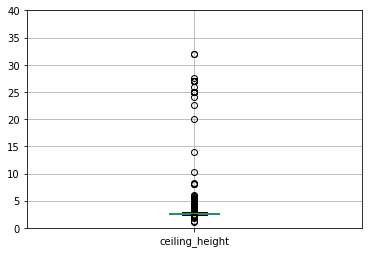

In [1729]:
plt.ylim(0, 40)
df.boxplot(column = 'ceiling_height');

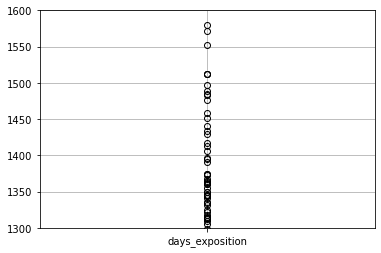

In [1730]:
plt.ylim(1300, 1600)
df.boxplot(column = 'days_exposition');

На предыдущих графиках видно, что следующие значения - выбросы, поэтому можем их отбросить:
    - цена: более 140000000
    - количество комнат: более 6
    - общая площадь: более 325 м2
    - жилая площадь: более 280 м2
    - площадь кухни: более 65м2
    - высота потолков: более 10м
    - продолжительность продажи: более 1500 дней

In [1731]:
print(df.shape[0])
old_df = df.copy()
df.drop(df[(df.last_price >= 140000000) | (df.rooms > 6) | (df.total_area > 325) | (df.living_area > 280) | (df.kitchen_area > 65) | (df.ceiling_height > 10) | (df.days_exposition > 1500)].index, inplace=True)
df.reset_index(inplace = True)
print(df.shape[0])


23565
23407


Посмотрим на гистограммы для старых данных с выбросами и новых данных после удаления выбросов. Посмотрим, что изменилось

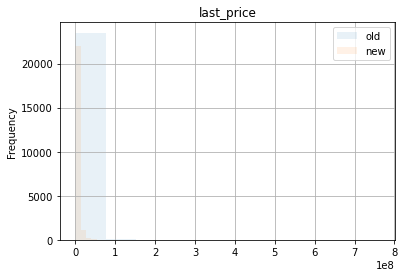

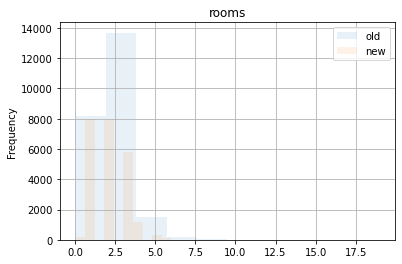

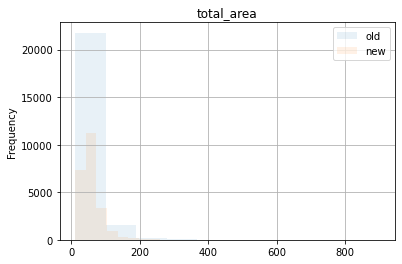

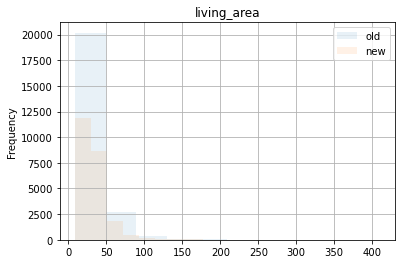

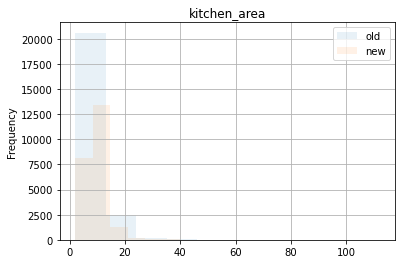

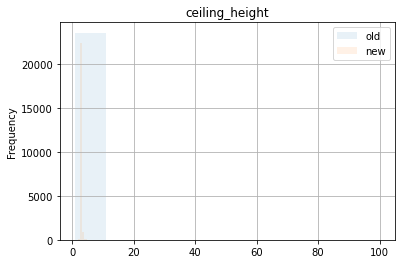

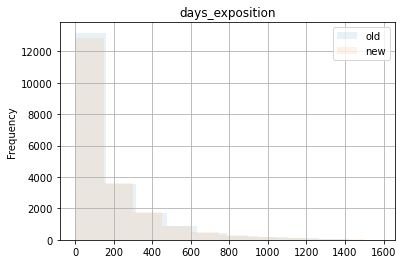

In [1732]:

cols = ['last_price','rooms','total_area','living_area','kitchen_area','ceiling_height','days_exposition']

for col in cols:
    df_axis = old_df.plot(kind = 'hist', y = col, title = col, bins = 10, alpha=0.1, grid = True, label = 'old')
    df.plot(kind = 'hist', y = col, title = col, bins = 10, alpha=0.1, ax = df_axis, grid = True, label = 'new')
    plt.show()

Без выбросов наиболее часто встречаемые параметры у продаваемых квартир изменились следующим образом:
- цена на квартиру стала ниже
- частота продаж однокомнатных квартир стала почти такой же как двухкомнатных
- общая площадь стала ниже
- жилая площадь осталась такой же
- площадь кухни немного увеличилась
- высота потолков стала значительно ниже
- время продажи не сильно изменилось


### Вывод

Посмотрели на диаграммы размаха и выявили, что данные значения являются выбросами. Удалили данные с такими параметрами из нашей таблицы:
    - цена: более 140000000
    - количество комнат: более 6
    - общая площадь: более 325 м2
    - жилая площадь: более 280 м2
    - площадь кухни: более 65м2
    - высота потолков: более 10м
    - продолжительность продажи: более 1500 дней
    
Без выбросов наиболее часто встречаемые параметры у продаваемых квартир изменились следующим образом:
    - цена на квартиру стала ниже
    - частота продаж однокомнатных квартир стала почти такой же как двухкомнатных
    - общая площадь стала ниже
    - жилая площадь осталась такой же
    - площадь кухни немного увеличилась
    - высота потолков стала значительно ниже
    - время продажи не сильно изменилось        

#### - Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 

Посмотрим на матрицу корреляции на столбец last_price

In [1733]:
df.corr()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,exposition_date_weekday,exposition_date_month,exposition_date_year,ratio_living_total_area,ratio_kitchen_total_area
index,1.000000,0.002008,-0.008886,-0.007201,-0.006556,-0.011845,-0.004364,-0.007216,-0.001916,0.001831,...,0.010374,0.006923,-0.020804,0.001061,-0.006489,0.007978,-0.006378,0.008261,0.004303,-0.001066
total_images,0.002008,1.000000,0.135616,0.126616,0.103043,0.048050,0.010116,0.129425,0.032505,-0.028227,...,-0.006445,-0.013568,-0.002637,-0.028086,0.137253,-0.008797,0.004356,0.140628,0.063659,-0.100973
last_price,-0.008886,0.135616,1.000000,0.734461,0.427121,0.360121,0.011120,0.703696,0.034175,-0.037246,...,-0.019587,0.201770,-0.117432,0.120335,0.752784,0.000291,0.003936,-0.055134,0.131229,-0.279140
total_area,-0.007201,0.126616,0.734461,1.000000,0.773102,0.368467,-0.065075,0.977462,-0.025351,-0.083546,...,-0.019634,0.169430,-0.094479,0.163995,0.277856,-0.007528,0.007241,-0.089281,0.290666,-0.531233
rooms,-0.006556,0.103043,0.427121,0.773102,1.000000,0.205381,-0.227455,0.797039,-0.156056,-0.155731,...,-0.054819,0.087925,-0.049840,0.125305,0.019782,-0.004223,-0.002854,-0.055185,0.449296,-0.644391
ceiling_height,-0.011845,0.048050,0.360121,0.368467,0.205381,1.000000,-0.074735,0.364495,-0.041630,0.011943,...,-0.051004,0.181093,-0.104827,0.102272,0.289553,-0.019315,-0.003525,-0.050457,0.080698,-0.146442
floors_total,-0.004364,0.010116,0.011120,-0.065075,-0.227455,-0.074735,1.000000,-0.092190,0.677458,0.070110,...,0.097112,-0.120808,0.037879,-0.050452,0.176870,0.012312,0.017032,0.007036,-0.174727,0.204333
living_area,-0.007216,0.129425,0.703696,0.977462,0.797039,0.364495,-0.092190,1.000000,-0.047382,-0.071584,...,-0.021845,0.162618,-0.091918,0.160483,0.250701,-0.009568,0.005679,-0.084924,0.450286,-0.621470
floor,-0.001916,0.032505,0.034175,-0.025351,-0.156056,-0.041630,0.677458,-0.047382,1.000000,0.035912,...,0.073401,-0.075724,0.025826,-0.038305,0.145104,0.010729,0.020984,0.004955,-0.129006,0.141614
studio,0.001831,-0.028227,-0.037246,-0.083546,-0.155731,0.011943,0.070110,-0.071584,0.035912,1.000000,...,0.006894,0.001141,0.001468,-0.021497,0.018950,-0.000897,-0.000721,0.010819,0.087362,0.047962


По ней видно, что больше всего на стоимость квартиры влияют размер общей и жилой площади.Цена не завиcит от количества комнат удалённости от центра и от даты размещения: дня недели, месяца и года.

Посмотрим зависит ли цена на квартиру от этажа. Переведем категории для этажей в числа, чтобы потом посмотреть коэффициент корреляции

In [1734]:
dict_floor = ({'первый':0,'последний':1,'другой':2})
df['floor_int'] = df['floor_type'].map(dict_floor)
df['floor_int'].corr(df['last_price'])

0.08009129182932946

### Вывод

На стоимость квартиры влияют размер общей и жилой площади.
На стоимость квартиры не влияет количество комнат, удалённость от центра, дата размещения, категория этажа( первый/последний)

#### - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений.Эти данные можно отличить по имени в столбце 'locality_name'.

Создадим таблицу towns_max_ads_stats, куда запишем среднюю цену за метр для 10 городов с наибольшим количеством объявлений

In [1735]:
towns_max_ads = df['locality_name'].value_counts().head(10).index.values

towns_max_ads_stats = df.query('locality_name in @towns_max_ads').pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = 'mean')
towns_max_ads_stats.sort_values(by='price_per_meter', ascending = False)

,price_per_meter
locality_name,
санкт-петербург,113890.270101
пушкин,103132.923497
деревня кудрово,92473.588629
поселок парголово,90332.236196
поселок мурино,86018.109589
поселок шушары,78551.359909
колпино,75333.287834
гатчина,68757.643791
всеволожск,68654.474874


Посмотрим во скольуо раз цена квадратного метра в Санкт-Петербурге больше чем в области

In [1736]:
price_per_meter_spb = towns_max_ads_stats.query('locality_name == "санкт-петербург"')['price_per_meter'].mean()
price_per_len_obl = towns_max_ads_stats.query('locality_name != "санкт-петербург"')['price_per_meter'].mean()
round(price_per_meter_spb / price_per_len_obl,2)

1.42

### Вывод

Для квартир с самым высоким количеством объявлений в Пушкине самая высокая цена из пригородов, а в Выборге -  самая низкая. Цена квадратного метра в Санкт-Петербурге выше в 1,4 раза чем в области

#### -Выделите сегменты типичных квартир в центре (по удалённости,числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

Создадим таблицу, в которой будем хранить для питерских квартир расстояние до центра города с точностью до километра и среднюю цену за квадратный метр

In [1737]:
spb_flats = df.loc[df['locality_name'] == 'санкт-петербург'].copy()
spb_flats['city_centers_nearest_km'] = round(spb_flats['city_centers_nearest'] / 1000)
city_centers_nearest_stats = spb_flats.pivot_table(index = 'city_centers_nearest_km', values = 'price_per_meter', aggfunc = 'mean')
city_centers_nearest_stats['km'] = city_centers_nearest_stats.index.values
city_centers_nearest_stats.head()

,price_per_meter,km
city_centers_nearest_km,,
0.0,218834.173913,0.0
1.0,158381.154696,1.0
2.0,154509.279070,2.0
3.0,121395.336310,3.0
4.0,128945.352155,4.0


Построим график зависимости цены от удаленности от центра

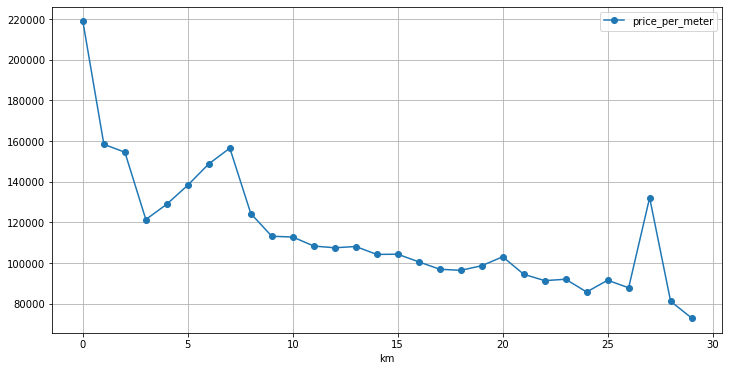

In [1738]:
city_centers_nearest_stats.plot(x = 'km', y = 'price_per_meter', style = 'o-', grid = True, figsize = (12,6));

Видно, что в районе 8 километров график резко падает. Будем считать квартиры с расстоянием до 8 километра - центр

Посмотрим гистограммы для центральных квартир и всех остальных, чтобы сравить основные параметры

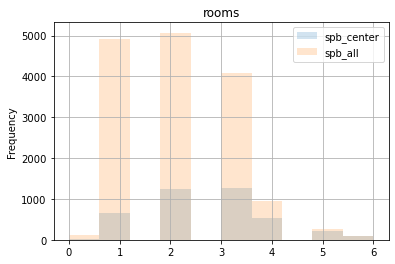

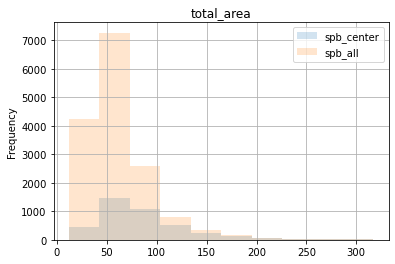

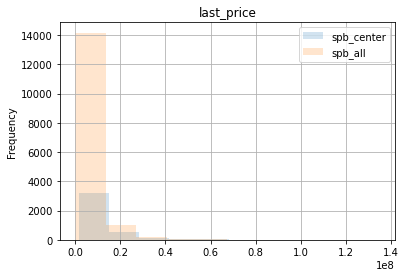

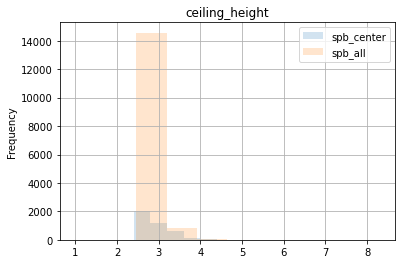

In [1739]:
spb_center_flats = spb_flats.loc[spb_flats['city_centers_nearest_km'] <= 8]


cols = ['rooms','total_area','last_price','ceiling_height']

for col in cols:
    spb_axis = spb_center_flats.plot(kind = 'hist', y = col, title = col, bins = 10, alpha=0.2, grid = True, label = 'spb_center')
    spb_flats.plot(kind = 'hist', y = col, title = col, bins = 10, alpha=0.2, ax = spb_axis, grid = True, label = 'spb_all')
    plt.show()

По графикам видно, что чаще встречаются в продаже квартиры:
- В центре Питера -с 2 и 3 комнатами, по всему Питеру - с 1 и 2
- В центре Питера -  с площадью от 50 до 100м, по всему Питеру - до 50
- В центре Питера с большей ценой, чем по всему Питеру
- В центре Питера с высотой потолков выше, чем по всему Питеру

Посмотрим, что влияет на цену квартир в центре Питера

In [1740]:
spb_center_flats.corr()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,price_per_meter,exposition_date_weekday,exposition_date_month,exposition_date_year,ratio_living_total_area,ratio_kitchen_total_area,floor_int,city_centers_nearest_km
index,1.000000,0.007914,-0.024411,-0.021380,-0.021282,-0.037687,0.017760,-0.022606,-0.016682,0.005549,...,-0.022761,-0.001214,-0.012298,0.001851,-0.009731,0.022666,-0.003411,0.000008,0.009251,0.025609
total_images,0.007914,1.000000,0.154295,0.102583,0.058625,0.077114,-0.068297,0.106686,-0.008262,-0.022056,...,-0.006115,-0.041625,0.155407,0.002492,-0.006399,0.146269,0.036490,-0.031911,0.047880,-0.025516
last_price,-0.024411,0.154295,1.000000,0.701092,0.391160,0.200113,0.034852,0.670286,0.093693,-0.038319,...,-0.113092,0.119007,0.768017,0.026435,-0.008417,-0.070656,0.054660,-0.245073,0.086444,-0.082534
total_area,-0.021380,0.102583,0.701092,1.000000,0.768890,0.269975,-0.021073,0.973102,0.071672,-0.071060,...,-0.073300,0.174844,0.208855,0.004450,-0.011339,-0.106891,0.167185,-0.480388,0.094067,-0.153774
rooms,-0.021282,0.058625,0.391160,0.768890,1.000000,0.235746,-0.191831,0.782041,-0.064123,-0.146836,...,-0.046755,0.144781,-0.043093,-0.015050,-0.017894,-0.073842,0.287152,-0.513204,0.027146,-0.204833
ceiling_height,-0.037687,0.077114,0.200113,0.269975,0.235746,1.000000,-0.256241,0.287093,-0.155757,0.036484,...,-0.070373,0.103207,0.093659,-0.045853,-0.019246,0.027361,0.122819,-0.177808,-0.013373,-0.257782
floors_total,0.017760,-0.068297,0.034852,-0.021073,-0.191831,-0.256241,1.000000,-0.058995,0.675066,0.016257,...,0.029007,0.001352,0.105820,0.030585,0.016995,-0.038169,-0.162657,0.105772,0.276455,0.428727
living_area,-0.022606,0.106686,0.670286,0.973102,0.782041,0.287093,-0.058995,1.000000,0.044672,-0.065960,...,-0.076253,0.177312,0.184573,-0.007097,-0.013895,-0.097186,0.351459,-0.541899,0.084064,-0.166720
floor,-0.016682,-0.008262,0.093693,0.071672,-0.064123,-0.155757,0.675066,0.044672,1.000000,-0.019784,...,0.017620,-0.002333,0.110157,0.030514,0.016671,-0.028784,-0.077283,0.003635,0.233917,0.279430
studio,0.005549,-0.022056,-0.038319,-0.071060,-0.146836,0.036484,0.016257,-0.065960,-0.019784,1.000000,...,0.022835,-0.030151,-0.001170,0.007452,0.012391,0.018667,0.040738,0.047343,-0.028606,0.017918


Посмотрим, что влияет на цену квартир во всем Питере

In [1741]:
spb_flats.corr()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,price_per_meter,exposition_date_weekday,exposition_date_month,exposition_date_year,ratio_living_total_area,ratio_kitchen_total_area,floor_int,city_centers_nearest_km
index,1.000000,0.004971,-0.008430,-0.006362,-0.008500,-0.013032,-0.001384,-0.007581,-0.009479,0.002584,...,-0.025377,0.003549,-0.004959,0.011955,-0.006029,0.021281,0.003563,-0.004627,-0.013253,0.003772
total_images,0.004971,1.000000,0.124030,0.110040,0.082408,0.044446,0.021250,0.112591,0.039648,-0.022599,...,-0.005114,-0.034791,0.125018,-0.002927,0.002777,0.147283,0.051290,-0.080169,0.037081,-0.001761
last_price,-0.008430,0.124030,1.000000,0.746214,0.442976,0.353896,-0.069388,0.717001,-0.010394,-0.037653,...,-0.128236,0.141767,0.756996,0.007947,-0.000492,-0.057851,0.125438,-0.287206,0.044138,-0.349601
total_area,-0.006362,0.110040,0.746214,1.000000,0.773109,0.387932,-0.099942,0.977545,-0.038588,-0.075206,...,-0.110779,0.189196,0.270319,-0.004105,0.002931,-0.099676,0.269936,-0.517349,0.014522,-0.352568
rooms,-0.008500,0.082408,0.442976,0.773109,1.000000,0.239019,-0.259179,0.794792,-0.166464,-0.148284,...,-0.064100,0.141539,0.000661,-0.007189,-0.006476,-0.063032,0.434197,-0.630293,-0.064395,-0.278520
ceiling_height,-0.013032,0.044446,0.353896,0.387932,0.239019,1.000000,-0.154514,0.388717,-0.085078,0.016323,...,-0.108624,0.131338,0.268723,-0.027624,-0.002484,-0.051889,0.097022,-0.173808,-0.017461,-0.418046
floors_total,-0.001384,0.021250,-0.069388,-0.099942,-0.259179,-0.154514,1.000000,-0.128911,0.647431,0.061112,...,0.018496,-0.044949,0.026679,0.023158,0.005112,0.019553,-0.206446,0.216134,0.269231,0.352216
living_area,-0.007581,0.112591,0.717001,0.977545,0.794792,0.388717,-0.128911,1.000000,-0.060778,-0.066879,...,-0.107108,0.186844,0.242101,-0.006632,0.001967,-0.094992,0.428302,-0.603290,0.005751,-0.356039
floor,-0.009479,0.039648,-0.010394,-0.038588,-0.166464,-0.085078,0.647431,-0.060778,1.000000,0.024809,...,0.015449,-0.032801,0.054578,0.018647,0.010073,0.012033,-0.141531,0.139950,0.263144,0.224554
studio,0.002584,-0.022599,-0.037653,-0.075206,-0.148284,0.016323,0.061112,-0.066879,0.024809,1.000000,...,0.001124,-0.020894,0.015902,0.001865,0.008311,0.012293,0.063291,0.051426,0.010194,0.015788


По матрицам корреляции видно, что цена и в центре Питера, и по всему Питеру зависит только от общей и жилой площади

#### Вывод

Построили график цены относительно удаленности от центра и выделили центр Петербурга как область с расстоянием до 8 км до центра

Выяснили, что чаше встречаются в продаже квартиры:
- В центре Питера - с 2 и 3 комнатами, по всему Питеру - с 1 и 2
- В центре Питера -  с площадью от 50 до 100м, по всему Питеру - до 50
- В центре Питера с большей ценой, чем по всему Питеру
- В центре Питера с высотой потолков выше, чем по всему Питеру

Выяснили, что цена и в центре Питера, и по всему Питеру зависит только от общей и жилой площади

#### - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену?Сравните со схожими параметрами квартир типовой планировки.

Посчитаем среднее по каждому из столбцов датафрейма для интересующих нас квартир и всех остальных квартир.Добавим эти два значения в новую таблицу. Если стандартное отклонение для столбца будет велико, а в среднем по всему датафрейму оно не велико, то значит в этом столбце хранятся характерные для этого вида квартир значения 

In [1742]:
is_apartment_mean_values = df.pivot_table(index = 'is_apartment',aggfunc = 'mean')
studio_mean_values = df.pivot_table(index = 'studio',aggfunc = 'mean')
open_plan_mean_values = df.pivot_table(index = 'open_plan',aggfunc = 'mean')


def print_top_std_for_table(in_df):
    res = pd.DataFrame(columns = ['col' ,'std'])
    for col in in_df:
        res.loc[len(res)] = [col,round(in_df[col].std())]
    print(res.sort_values(by = 'std',ascending = False).head(10))

    
print('aparts') 
print_top_std_for_table(is_apartment_mean_values)
print('studio') 
print_top_std_for_table(studio_mean_values)
print('open plan') 
print_top_std_for_table(open_plan_mean_values)

aparts
                     col        std
13            last_price  3469162.0
20       price_per_meter    26928.0
0       airports_nearest     3675.0
3   city_centers_nearest     1945.0
11                 index      424.0
17         parks_nearest      190.0
19         ponds_nearest       40.0
25            total_area       10.0
14           living_area        8.0
10          floors_total        3.0
studio
                     col        std
13            last_price  2217670.0
20       price_per_meter     7566.0
0       airports_nearest     2755.0
3   city_centers_nearest      338.0
11                 index      112.0
4        days_exposition       41.0
17         parks_nearest       33.0
24            total_area       22.0
14           living_area       12.0
19         ponds_nearest        4.0
open plan
                     col        std
13            last_price  1731022.0
19       price_per_meter     5004.0
0       airports_nearest     2715.0
3   city_centers_nearest     1067.0
4   

Можно выявить следующие характерные признаки для квартир с нетиповой планировкой:total_area, living_area. Посмотрим влияют ли они на цену

Выделим из общего датасета квартиры стандартной и нестандартной планировки

In [1743]:
cols = ['total_area', 'living_area','last_price']
standard_plan_flats = df.loc[(df['is_apartment'] == False) & (df['studio'] == False) & (df['open_plan'] == False)][cols]
not_standard_plan_flats = df.loc[(df['is_apartment'] == True) | (df['studio'] == True) | (df['open_plan'] == True)][cols]


Посмотрим влияют ли параметры total_area, living_area на цену квартиры

In [1744]:
not_standard_plan_flats.corr()

,total_area,living_area,last_price
total_area,1.000000,0.983499,0.793920
living_area,0.983499,1.000000,0.774601
last_price,0.793920,0.774601,1.000000


Цена на квартиры с нестандартной планировкой зависят от общей площади и жилой площади

Посмотрим описательные статистики для квартир со стандартной планировкой

In [1745]:
not_standard_plan_flats.describe()

,total_area,living_area,last_price
count,255.000000,254.000000,2.550000e+02
mean,37.065529,22.906909,4.641079e+06
std,27.697140,17.321406,6.817225e+06
min,15.500000,10.000000,9.457500e+05
25%,25.000000,16.000000,2.350000e+06
50%,27.320000,17.000000,3.090000e+06
75%,32.500000,19.000000,3.895000e+06
max,245.800000,170.800000,5.684450e+07


Посмотрим описательные статистики для квартир с нестандартной планировкой

In [1746]:
standard_plan_flats.describe()

,total_area,living_area,last_price
count,2671.000000,2665.000000,2.671000e+03
mean,60.687173,35.134795,6.275834e+06
std,29.346166,18.386685,6.616687e+06
min,13.000000,10.000000,5.500000e+05
25%,41.000000,19.550000,3.500000e+06
50%,54.000000,30.650000,4.700000e+06
75%,72.000000,43.400000,6.800000e+06
max,312.000000,163.500000,1.250000e+08


Можем сделать вывод, что квартиры со стандартной планировкой в среднем больше по общей и жилой площади чем с нестандартной

### Вывод

Выявили, что для квартир с нестандартной планировкой характерные параметры: total_area, living_area.
Цены на квартиры с нестандартной планировкой зависят от общей площади и жилой площади. Квартиры со стандартной планировкой в среднем больше по общей и жилой площади чем с нестандартной

### Шаг 5. Общий вывод

Изучили данные. Определили пропущенные значения. Часть из них оставили, часть - заменили на медиану по группе, часть - на медиану по всему датафрейму, часть - заменили на 0. Поменяли тип данных у части столбцов, проверили данные на дубликаты. Добавили в таблицу новые колонки. Выявили характерные параметры для продаваемых квартир.Сделали следующие выводы по данным:
- Процесс продажи длится обычно до 60 дней. Медиана больше среднего для количества дней до продажи примерно в 2 раза, что значит, что данные очень сильно разбросаны по этому параметру. Можно считать, что продажа прошла очень быстро, если она заняла до 25 дней и очень медленно, если более 230 дней
- После удаления выбросов из данных все параметры типичных квартир изменились кроме жилой площади и времени продажи
- Для квартир с самым высоким количеством объявлений в Пушкине самая высокая цена из пригородов, а в Выборге -  самая низкая. Цена квадратного метра в Санкт-Петербурге выше в 1,4 раза чем в области
- На стоимость квартиры больше всего влияют размер общей и жилой площади. Это характерно для разных типов квартир: в центре Питера, вне центра Питера, со стандартной планировкой, нестандартной планировкой
- На стоимость квартиры не влияет количество комнат, удалённость от центра, дата размещения, категория этажа( первый/последний)
- Выяснили, что в центре Питера продаются квартиры больше чем в области по метражу, более дорогие, с большей высотой потолков и с большим количеством комнат
- Квартиры со стандартной планировкой в среднем больше по общей и жилой площади чем с нестандартной

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод